In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\LENOVO\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Analysis of the dataset
### We examine the structure of the dataset looking for relevant columns for the analysis

In [2]:
tweets=pd.read_csv('C:/Users/LENOVO/Desktop/Proyecto-Mineria/Toxic tweets dataset - annotator2.csv')
tweets

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment
0,9.411401e+17,AmiIcarCajadas,NaN,NaN,9.411397e+17,"@PabloJarrinT Delfín el Leicester criollo, cam...",2017-12-14 2:57:38,9.411397e+17,2,https://www.twitter.com/AmiIcarCajadas/status/...,0,0,0,0,0,0,@PabloJarrinT,La página no existe,NaN
1,8.512670e+17,verosanza,NaN,NaN,8.512659e+17,@Martinminguchi Desde dónde lo estará escribie...,2017-04-10 2:53:56,8.512659e+17,2,https://www.twitter.com/verosanza/status/85126...,0,0,0,0,0,0,@GuillaumeLong,Desde dónde lo estará escribiendo...Francia???...,ninguno
2,9.367120e+17,estebancarranco,NaN,NaN,9.366059e+17,@aituitu Respeto su criterio amigo pero si fue...,2017-12-01 21:41:53,9.365740e+17,3,https://www.twitter.com/estebancarranco/status...,0,0,0,0,0,0,@aituitu,"Respeto su criterio amigo pero si fuese así, n...",discrepa pero es respetuoso
3,9.619900e+17,LuisAndrade2,NaN,NaN,9.617694e+17,"@higuerahernan Creo porque ""es multi facético,...",2018-02-09 15:47:40,9.617694e+17,2,https://www.twitter.com/LuisAndrade2/status/96...,0,0,0,0,0,0,external,"Creo porque ""es multi facético, inteligente y ...",alabanza
4,9.748170e+17,VinicioChimbor1,NaN,NaN,9.744270e+17,@luisevivanco Hágase revisar la presión del oj...,2018-03-17 1:17:48,9.744270e+17,2,https://www.twitter.com/VinicioChimbor1/status...,0,0,0,0,0,0,@luisevivanco,"Hágase revisar la presión del ojo, el parpadeo...",consejo
5,9.529467e+17,DavidAndres27,NaN,NaN,9.523808e+17,@jcarlosaizprua #ImbaburaDiceNO y todo el Ecua...,2018-01-15 16:52:55,9.523808e+17,2,https://www.twitter.com/DavidAndres27/status/9...,0,0,0,0,0,0,external,#ImbaburaDiceNO y todo el Ecuador no se deja e...,polìtico
6,9.121508e+17,CarlosVerareal,NaN,NaN,NaN,Pendejo. Perdido. Sin argumentos. https://t.co...,2017-09-25 3:04:28,9.121508e+17,1,https://www.twitter.com/CarlosVerareal/status/...,0,0,0,0,0,1,external,Pendejo. Perdido. Sin argumentos.,insulto
7,9.589062e+17,savirosero,NaN,NaN,9.588601e+17,@marcelaholguin @UNIMAXTV @SomosEcuador3 @Dile...,2018-02-01 3:33:56,9.588601e+17,2,https://www.twitter.com/savirosero/status/9589...,0,0,0,0,0,1,external,Mijita con esos apagones del CNE solo idiotas ...,insulto
8,9.387632e+17,Martinminguchi,NaN,NaN,NaN,Orden de Prisión en contra de Cristina Elisabe...,2017-12-07 13:32:31,9.387632e+17,1,https://www.twitter.com/Martinminguchi/status/...,0,0,0,0,0,0,na,Orden de Prisión en contra de Cristina Elisabe...,NaN
9,9.228456e+17,7david1992,NaN,NaN,9.228237e+17,@AlejaDuqueR @mashifraga Cuál es tu usuario en...,2017-10-24 15:21:57,9.228237e+17,2,https://www.twitter.com/7david1992/status/9228...,0,0,0,0,0,0,@AlejaDuqueR,Cuál es tu usuario en Snap Ale?,NaN


# Harmful Speech
## We are trying to visualize different types of harmful speech in the dataset using the 6 columns present in the dataset

Text(0.5,1,'Number of Harmful Speech by category')

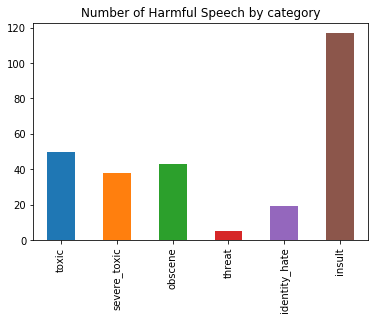

In [4]:
tweets[['toxic','severe_toxic','obscene','threat','identity_hate','insult']].sum().plot.bar()
plt.title('Number of Harmful Speech by category')

## We found that the use of sentiment analysis in the tweet is not useful because the text is too short giving us values from 0 to 0.500 or -0.500

In [5]:
sid = SentimentIntensityAnalyzer() 
tweets["sentiment"] = tweets["text"].apply(lambda x: sid.polarity_scores(x)["compound"])
tweets

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment,sentiment
0,9.411401e+17,AmiIcarCajadas,NaN,NaN,9.411397e+17,"@PabloJarrinT Delfín el Leicester criollo, cam...",2017-12-14 2:57:38,9.411397e+17,2,https://www.twitter.com/AmiIcarCajadas/status/...,0,0,0,0,0,0,@PabloJarrinT,La página no existe,NaN,0.0000
1,8.512670e+17,verosanza,NaN,NaN,8.512659e+17,@Martinminguchi Desde dónde lo estará escribie...,2017-04-10 2:53:56,8.512659e+17,2,https://www.twitter.com/verosanza/status/85126...,0,0,0,0,0,0,@GuillaumeLong,Desde dónde lo estará escribiendo...Francia???...,ninguno,0.0000
2,9.367120e+17,estebancarranco,NaN,NaN,9.366059e+17,@aituitu Respeto su criterio amigo pero si fue...,2017-12-01 21:41:53,9.365740e+17,3,https://www.twitter.com/estebancarranco/status...,0,0,0,0,0,0,@aituitu,"Respeto su criterio amigo pero si fuese así, n...",discrepa pero es respetuoso,0.0000
3,9.619900e+17,LuisAndrade2,NaN,NaN,9.617694e+17,"@higuerahernan Creo porque ""es multi facético,...",2018-02-09 15:47:40,9.617694e+17,2,https://www.twitter.com/LuisAndrade2/status/96...,0,0,0,0,0,0,external,"Creo porque ""es multi facético, inteligente y ...",alabanza,0.0000
4,9.748170e+17,VinicioChimbor1,NaN,NaN,9.744270e+17,@luisevivanco Hágase revisar la presión del oj...,2018-03-17 1:17:48,9.744270e+17,2,https://www.twitter.com/VinicioChimbor1/status...,0,0,0,0,0,0,@luisevivanco,"Hágase revisar la presión del ojo, el parpadeo...",consejo,0.0000
5,9.529467e+17,DavidAndres27,NaN,NaN,9.523808e+17,@jcarlosaizprua #ImbaburaDiceNO y todo el Ecua...,2018-01-15 16:52:55,9.523808e+17,2,https://www.twitter.com/DavidAndres27/status/9...,0,0,0,0,0,0,external,#ImbaburaDiceNO y todo el Ecuador no se deja e...,polìtico,-0.2960
6,9.121508e+17,CarlosVerareal,NaN,NaN,NaN,Pendejo. Perdido. Sin argumentos. https://t.co...,2017-09-25 3:04:28,9.121508e+17,1,https://www.twitter.com/CarlosVerareal/status/...,0,0,0,0,0,1,external,Pendejo. Perdido. Sin argumentos.,insulto,-0.5574
7,9.589062e+17,savirosero,NaN,NaN,9.588601e+17,@marcelaholguin @UNIMAXTV @SomosEcuador3 @Dile...,2018-02-01 3:33:56,9.588601e+17,2,https://www.twitter.com/savirosero/status/9589...,0,0,0,0,0,1,external,Mijita con esos apagones del CNE solo idiotas ...,insulto,0.0000
8,9.387632e+17,Martinminguchi,NaN,NaN,NaN,Orden de Prisión en contra de Cristina Elisabe...,2017-12-07 13:32:31,9.387632e+17,1,https://www.twitter.com/Martinminguchi/status/...,0,0,0,0,0,0,na,Orden de Prisión en contra de Cristina Elisabe...,NaN,0.0000
9,9.228456e+17,7david1992,NaN,NaN,9.228237e+17,@AlejaDuqueR @mashifraga Cuál es tu usuario en...,2017-10-24 15:21:57,9.228237e+17,2,https://www.twitter.com/7david1992/status/9228...,0,0,0,0,0,0,@AlejaDuqueR,Cuál es tu usuario en Snap Ale?,NaN,0.0000


## Changing the index column we order the tweets by date looking for some aditional information that can contribute to our investigation

In [6]:
tweets.index=pd.to_datetime(tweets['timestamp'],infer_datetime_format=True)
tweets

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,url,toxic,severe_toxic,obscene,threat,identity_hate,insult,target,extended,comment,sentiment
timestamp,,,,,,,,,,,,,,,,,,,,
2017-12-14 02:57:38,9.411401e+17,AmiIcarCajadas,NaN,NaN,9.411397e+17,"@PabloJarrinT Delfín el Leicester criollo, cam...",2017-12-14 2:57:38,9.411397e+17,2,https://www.twitter.com/AmiIcarCajadas/status/...,0,0,0,0,0,0,@PabloJarrinT,La página no existe,NaN,0.0000
2017-04-10 02:53:56,8.512670e+17,verosanza,NaN,NaN,8.512659e+17,@Martinminguchi Desde dónde lo estará escribie...,2017-04-10 2:53:56,8.512659e+17,2,https://www.twitter.com/verosanza/status/85126...,0,0,0,0,0,0,@GuillaumeLong,Desde dónde lo estará escribiendo...Francia???...,ninguno,0.0000
2017-12-01 21:41:53,9.367120e+17,estebancarranco,NaN,NaN,9.366059e+17,@aituitu Respeto su criterio amigo pero si fue...,2017-12-01 21:41:53,9.365740e+17,3,https://www.twitter.com/estebancarranco/status...,0,0,0,0,0,0,@aituitu,"Respeto su criterio amigo pero si fuese así, n...",discrepa pero es respetuoso,0.0000
2018-02-09 15:47:40,9.619900e+17,LuisAndrade2,NaN,NaN,9.617694e+17,"@higuerahernan Creo porque ""es multi facético,...",2018-02-09 15:47:40,9.617694e+17,2,https://www.twitter.com/LuisAndrade2/status/96...,0,0,0,0,0,0,external,"Creo porque ""es multi facético, inteligente y ...",alabanza,0.0000
2018-03-17 01:17:48,9.748170e+17,VinicioChimbor1,NaN,NaN,9.744270e+17,@luisevivanco Hágase revisar la presión del oj...,2018-03-17 1:17:48,9.744270e+17,2,https://www.twitter.com/VinicioChimbor1/status...,0,0,0,0,0,0,@luisevivanco,"Hágase revisar la presión del ojo, el parpadeo...",consejo,0.0000
2018-01-15 16:52:55,9.529467e+17,DavidAndres27,NaN,NaN,9.523808e+17,@jcarlosaizprua #ImbaburaDiceNO y todo el Ecua...,2018-01-15 16:52:55,9.523808e+17,2,https://www.twitter.com/DavidAndres27/status/9...,0,0,0,0,0,0,external,#ImbaburaDiceNO y todo el Ecuador no se deja e...,polìtico,-0.2960
2017-09-25 03:04:28,9.121508e+17,CarlosVerareal,NaN,NaN,NaN,Pendejo. Perdido. Sin argumentos. https://t.co...,2017-09-25 3:04:28,9.121508e+17,1,https://www.twitter.com/CarlosVerareal/status/...,0,0,0,0,0,1,external,Pendejo. Perdido. Sin argumentos.,insulto,-0.5574
2018-02-01 03:33:56,9.589062e+17,savirosero,NaN,NaN,9.588601e+17,@marcelaholguin @UNIMAXTV @SomosEcuador3 @Dile...,2018-02-01 3:33:56,9.588601e+17,2,https://www.twitter.com/savirosero/status/9589...,0,0,0,0,0,1,external,Mijita con esos apagones del CNE solo idiotas ...,insulto,0.0000
2017-12-07 13:32:31,9.387632e+17,Martinminguchi,NaN,NaN,NaN,Orden de Prisión en contra de Cristina Elisabe...,2017-12-07 13:32:31,9.387632e+17,1,https://www.twitter.com/Martinminguchi/status/...,0,0,0,0,0,0,na,Orden de Prisión en contra de Cristina Elisabe...,NaN,0.0000


## We obained the number of tweets by weekday, this brings us information about the days where the people write more

Text(0.5,1,'Frequency of tweets by weekday')

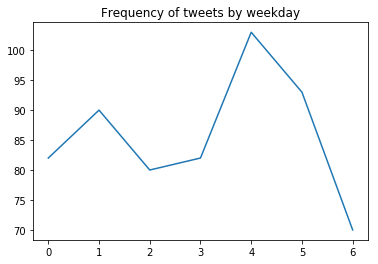

In [7]:
tweets=tweets.sort_index(ascending=True)
tweets.index.weekday.value_counts().sort_index().plot()
plt.title('Frequency of tweets by weekday')

# Use of LDA
## First we will join all the tweets in a corpus and search for topics pllying TFIDF model

In [8]:
corpus=[]
a=[]
for i in range(len(tweets['text'])):
        a=tweets['text'][i]
        corpus.append(a)
import gensim
import logging
import tempfile

TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Folder "C:\Users\LENOVO\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [10]:
from nltk.corpus import stopwords
from string import punctuation
import os

# remove common words and tokenize
list1 = ['RT','rt']
stoplist = stopwords.words('spanish') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus] 

2019-01-16 12:20:11,882 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-01-16 12:20:11,904 : INFO : built Dictionary(3420 unique tokens: ['@diegowmm', 'alfaro', 'bajaron', 'ciudad', 'escuchando']...) from 600 documents (total 5289 corpus positions)
2019-01-16 12:20:11,907 : INFO : saving Dictionary object under C:\Users\LENOVO\AppData\Local\Temp\elon.dict, separately None
2019-01-16 12:20:11,920 : INFO : saved C:\Users\LENOVO\AppData\Local\Temp\elon.dict
2019-01-16 12:20:11,943 : INFO : storing corpus in Matrix Market format to C:\Users\LENOVO\AppData\Local\Temp\elon.mm
2019-01-16 12:20:11,946 : INFO : saving sparse matrix to C:\Users\LENOVO\AppData\Local\Temp\elon.mm
2019-01-16 12:20:11,949 : INFO : PROGRESS: saving document #0
2019-01-16 12:20:11,981 : INFO : saved 600x3420 matrix, density=0.254% (5202/2052000)
2019-01-16 12:20:11,984 : INFO : saving MmCorpus index to C:\Users\LENOVO\AppData\Local\Temp\elon.mm.index
2019-01-16 12:20:11,991 : INFO : collecting docu

In [11]:
total_topics = 5
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] 
lda.show_topics(total_topics,5)
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

2019-01-16 12:21:51,637 : INFO : using symmetric alpha at 0.2
2019-01-16 12:21:51,641 : INFO : using symmetric eta at 0.2
2019-01-16 12:21:51,645 : INFO : using serial LDA version on this node
2019-01-16 12:21:51,735 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 600 documents, updating model once every 600 documents, evaluating perplexity every 600 documents, iterating 50x with a convergence threshold of 0.001000
2019-01-16 12:21:51,742 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-01-16 12:21:53,050 : INFO : -11.130 per-word bound, 2241.5 perplexity estimate based on a held-out corpus of 600 documents with 5289 words
2019-01-16 12:21:53,052 : INFO : PROGRESS: pass 0, at document #600/600
2019-01-16 12:21:53,813 : INFO : topic #0 (0.200): 0.011*"@aguschmer" + 0.010*"@carlosverareal" + 0.009*"puta" + 0.007*"ser" + 0.006*"q" + 0.006*"@lahistoria

(64, 5)
(5, 64)


,!!,..,@aguschmer,@anniecanizares,@arturo_m13,@camilin86,@carlosgalvez21,@carlosverareal,@fabriciovelav,@janethinostroza,...,sabes,ser,si,siempre,solo,va,veo,vida,x,xq
0,0.000000,0.000000,0.010906,0.000000,0.002846,0.000000,0.000000,0.009512,0.000000,0.002279,...,0.000000,0.006823,0.005317,0.000000,0.000000,0.000000,0.002668,0.000000,0.000000,0.002616
1,0.000000,0.000000,0.005283,0.004343,0.002652,0.000000,0.000000,0.000000,0.000000,0.004038,...,0.002488,0.000000,0.003372,0.000000,0.003157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.002842,0.000000,0.000000,0.000000,0.000000,0.004080,0.000000,0.003696,...,0.000000,0.003225,0.008614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.002446,0.005339,0.000000,0.000000,0.000000,0.000000,0.005350,0.000000,0.006389,...,0.000000,0.005476,0.005927,0.003163,0.000000,0.002601,0.000000,0.000000,0.002387,0.000000
4,0.002349,0.000000,0.004364,0.000000,0.002513,0.001792,0.003074,0.002498,0.002295,0.002343,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001795,0.000000,0.002912,0.000000,0.000000


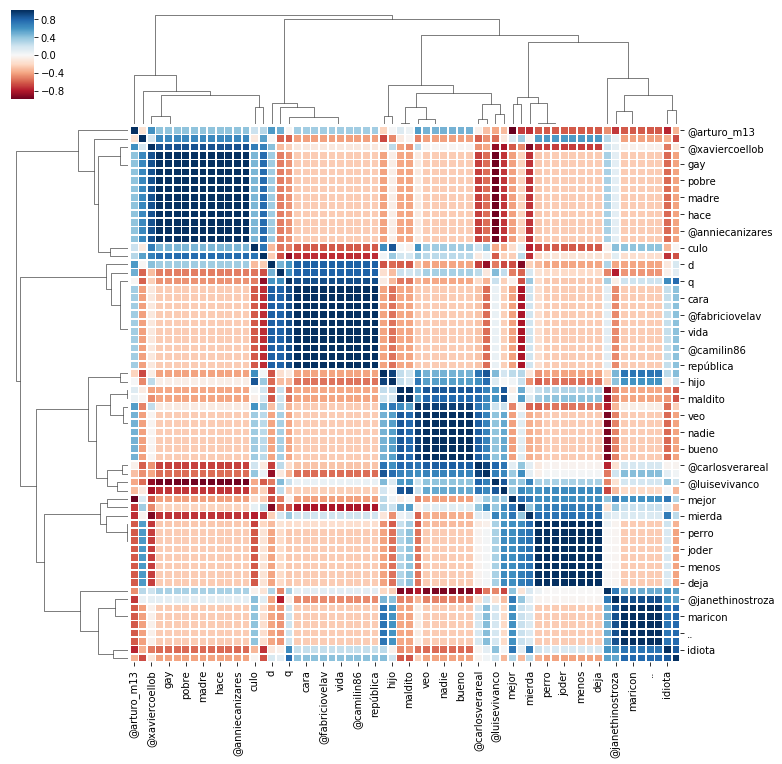

In [12]:
g=sb.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [14]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
2      59.988754        1       1  229.275436  -67.461601
1      10.003214        1       2  134.448624 -301.029816
3      10.002918        1       3 -111.649673  -65.169411
4      10.002570        1       4 -126.574989 -317.546936
0      10.002539        1       5   53.517311  126.230171, topic_info=     Category      Freq              Term     Total  loglift  logprob
term                                                                 
189   Default  3.000000              puta  3.000000  30.0000  30.0000
25    Default  2.000000        @aguschmer  2.000000  29.0000  29.0000
19    Default  4.000000                 q  4.000000  28.0000  28.0000
701   Default  2.000000   @carlosverareal  2.000000  27.0000  27.0000
664   Default  2.000000     @lahistoriaec  2.000000  26.0000  26.0000
70    Default  2.000000               ser  2.000000  25.0000  25.0000
224   Default  1.000000              hijo  1.000000  24.0000  24.0000
61    Default  5.000000            mierda  5.000000  23.0000  23.0000
718   Default  2.000000  @janethinostroza  2.000000  22.0000  22.0000
63    Default  4.000000                si  4.000000  21.0000  21.0000
1146  Default  0.000000   @anniecanizares  0.000000  20.0000  20.0000
1301  Default  2.000000     @luisevivanco  2.000000  19.0000  19.0000
56    Default  1.000000    @xaviercoellob  1.000000  18.0000  18.0000
567   Default  1.000000           maldito  1.000000  17.0000  17.0000
1279  Default  1.000000            @lenin  1.000000  16.0000  16.0000
211   Default  0.000000                 d  0.000000  15.0000  15.0000
31    Default  0.000000              bien  0.000000  14.0000  14.0000
386   Default  2.000000      @tinocotania  2.000000  13.0000  13.0000
1085  Default  0.000000                ja  0.000000  12.0000  12.0000
231   Default  1.000000            idiota  1.000000  11.0000  11.0000
904   Default  0.000000             madre  0.000000  10.0000  10.0000
984   Default  1.000000             hijos  1.000000   9.0000   9.0000
783   Default  0.000000       @arturo_m13  0.000000   8.0000   8.0000
617   Default  0.000000           siempre  0.000000   7.0000   7.0000
662   Default  0.000000              culo  0.000000   6.0000   6.0000
852   Default  0.000000              solo  0.000000   5.0000   5.0000
1539  Default  0.000000          jajajaja  0.000000   4.0000   4.0000
237   Default  0.000000   @carlosgalvez21  0.000000   3.0000   3.0000
719   Default  0.000000               así  0.000000   2.0000   2.0000
788   Default  0.000000                va  0.000000   1.0000   1.0000
...       ...       ...               ...       ...      ...      ...
25     Topic5  0.654539        @aguschmer  2.576741   0.9320  -4.5184
224    Topic5  0.362777              hijo  1.189086   1.1152  -5.1086
30     Topic5  0.168908           mierda,  0.445558   1.3324  -5.8730
701    Topic5  0.570885   @carlosverareal  2.559789   0.8018  -4.6552
70     Topic5  0.409490               ser  2.017935   0.7074  -4.9874
23     Topic5  0.103698            tiempo  0.240614   1.4606  -6.3609
189    Topic5  0.527380              puta  3.609595   0.3789  -4.7344
664    Topic5  0.368055     @lahistoriaec  2.685793   0.3148  -5.0941
567    Topic5  0.226839           maldito  1.213545   0.6253  -5.5781
1279   Topic5  0.208500            @lenin  1.049606   0.6861  -5.6624
662    Topic5  0.142667              culo  0.504151   1.0400  -6.0418
308    Topic5  0.103687             puede  0.270993   1.3416  -6.3610
995    Topic5  0.127387               ver  0.409813   1.1339  -6.1551
386    Topic5  0.325018      @tinocotania  2.833925   0.1368  -5.2185
783    Topic5  0.170827       @arturo_m13  0.769179   0.7977  -5.8617
31     Topic5  0.154316              bien  0.637991   0.8830  -5.9634
19     Topic5  0.373368                 q  4.126903  -0.1004  -5.0798
1301   Topic5  0.277287     @luisevivanco  2.344423